**Q1. Problem Statement: Confusion Matrix**

Load the 'Breast_Cancer_Dataset.csv' dataset into a DataFrame and perform the following tasks:
1.	Identify the null values and remove the null rows and columns by using the dropna() function
2.	Encode the 'diagnosis' column using the LabelEncoder()
3.	Considering the 'diagnosis' column as the target, separate the target variable and the feature vectors
4.	Split the dataset into the training set and test set in a 70:30 ratio
5.	 Building a Logistic Regression, Naive Bayes, Decision Tree (CART), K-NN, SVM, and RandomForestClassifier models; Also print their accuracies
6.	Calculate and plot the confusion matrix


**Step-1:** importing the required libraries.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Step-2:** Loading the CSV data into a DataFrame.


In [ ]:
data=pd.read_csv("/content/sample_data/Breast_Cancer_Dataset.csv")
df = data.copy()
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Step-3:** Identifying and dropping the null rows/columns.

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df = df.iloc[: , :-1]

**Step-4:** Encoding the 'diagnosis' column using the LabelEncoder()


In [ ]:
le = preprocessing.LabelEncoder()
df.diagnosis = le.fit_transform(df['diagnosis'])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Step-5:** Separating the target variable and the feature vectors.

In [ ]:
X = df.drop(["diagnosis"], axis=1) # Features
y = df["diagnosis"] # Target variable


In [ ]:
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X.columns.value_counts()

id                         1
compactness_se             1
symmetry_worst             1
concave points_worst       1
concavity_worst            1
compactness_worst          1
smoothness_worst           1
area_worst                 1
perimeter_worst            1
texture_worst              1
radius_worst               1
fractal_dimension_se       1
symmetry_se                1
concave points_se          1
concavity_se               1
smoothness_se              1
radius_mean                1
area_se                    1
perimeter_se               1
texture_se                 1
radius_se                  1
fractal_dimension_mean     1
symmetry_mean              1
concave points_mean        1
concavity_mean             1
compactness_mean           1
smoothness_mean            1
area_mean                  1
perimeter_mean             1
texture_mean               1
fractal_dimension_worst    1
dtype: int64

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

**Step-6:**  Splitting the dataset into training set and test set.

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

**Step-7:** Building a Logistic Regression, Naive Bayes, Decision Tree (CART), K-NN, SVM, and RandomForestClassifier models. Also,print their respective accuracies.

**Hint:** You can declare the algorithms in a list and iterate through them to build their respective models and calcult thier accuracies using a for loop.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier


models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree (CART)',DecisionTreeClassifier()))
models.append(('K-NN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('RandomForestClassifier', RandomForestClassifier()))


for name, model in models:
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    from sklearn import metrics

    print("%s -> ACC: %%%.2f" % (name,metrics.accuracy_score(y_test, y_pred)*100))

Logistic Regression -> ACC: %63.16
Naive Bayes -> ACC: %63.16
Decision Tree (CART) -> ACC: %93.57
K-NN -> ACC: %76.61
SVM -> ACC: %63.16
RandomForestClassifier -> ACC: %94.15


**Step-8:** Calculating and plotting the confusion matrix.

[[103   5]
 [  5  58]]


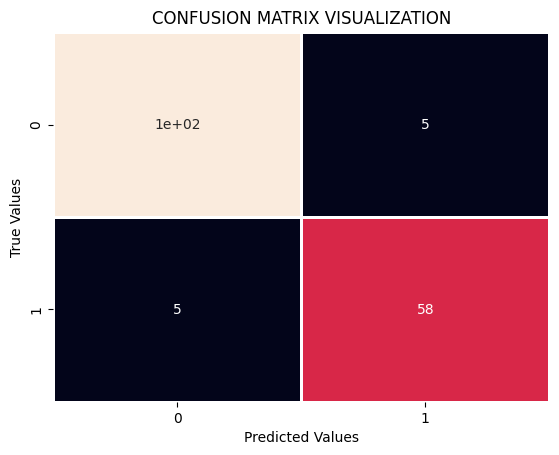

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred,labels=[0,1]))
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
plt.show()

**Result:** From the confusion matrix we can conclude that, there are:
1. 105 true negative diagnosis
2. 3 false positive diagnosis
3. 6 false negetive diagnosis
4. 57 true positive diagnosis

Hence the accuracy shown by the models is very close to the results shown by the confusion matrix.